>Liberaries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [50]:
import warnings as warn
warn.filterwarnings("ignore")

>Data Set

In [3]:
df = pd.read_csv("./data/insurance.csv")

>Data Exploration

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.shape

(1338, 7)

In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [8]:
df['charges'].value_counts()

charges
1639.56310     2
2221.56445     1
19798.05455    1
13063.88300    1
13555.00490    1
              ..
1149.39590     1
37079.37200    1
4738.26820     1
2897.32350     1
4762.32900     1
Name: count, Length: 1337, dtype: int64

In [9]:
num_features = ['age', 'bmi', 'charges', 'children']

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [11]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


>PLots

In [12]:
df[num_features].corr()

,age,bmi,charges,children
age,1.000000,0.109272,0.299008,0.042469
bmi,0.109272,1.000000,0.198341,0.012759
charges,0.299008,0.198341,1.000000,0.067998
children,0.042469,0.012759,0.067998,1.000000


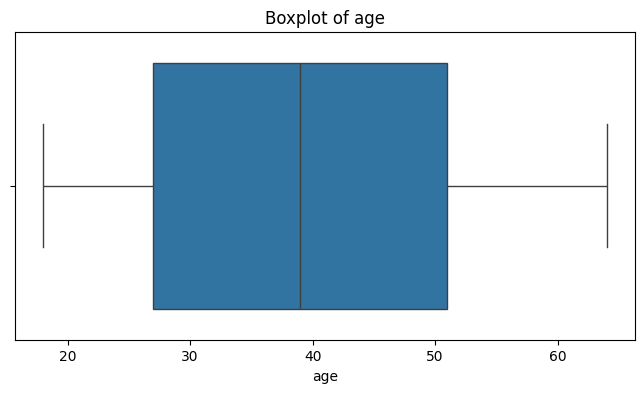

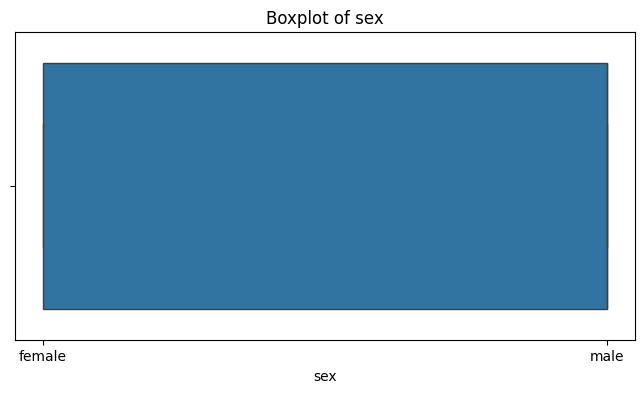

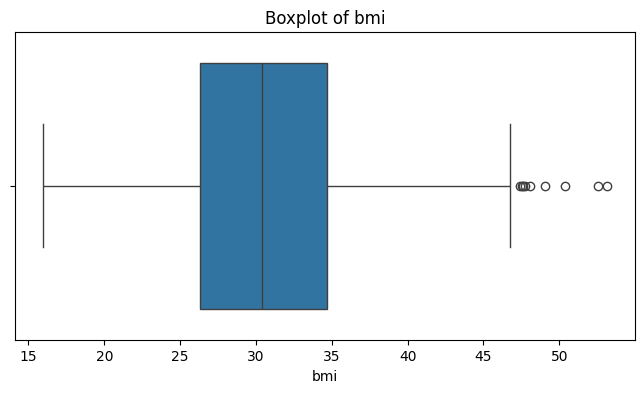

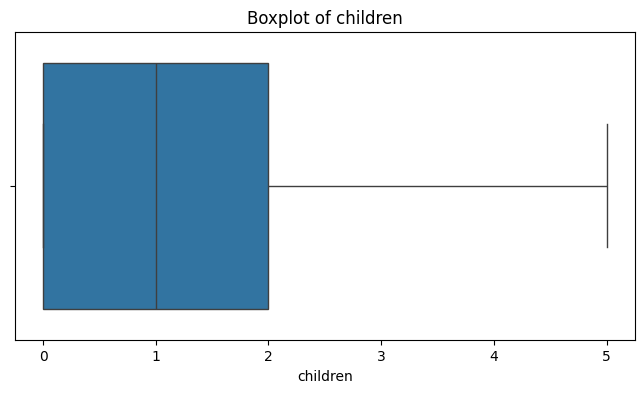

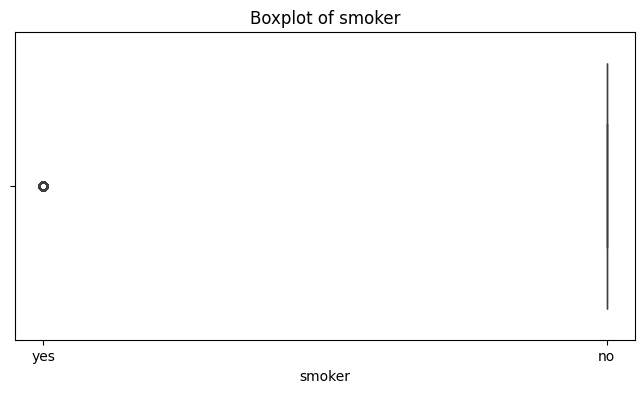

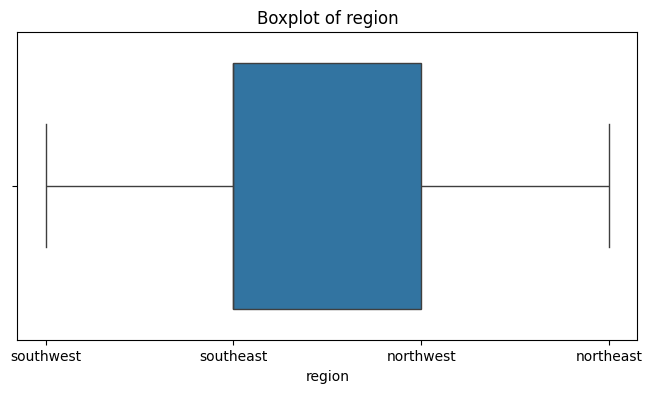

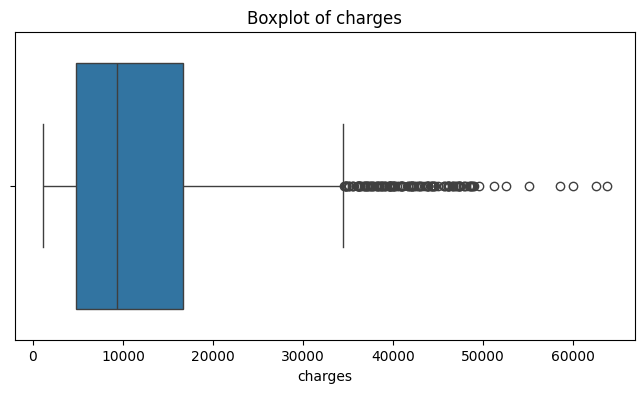

In [13]:
features = ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

# Plot boxplots for each feature
for feature in features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot of {feature}')
    plt.show()


In [14]:
for feature in ['bmi']:
    lower_bound = df[feature].quantile(0.01)
    upper_bound = df[feature].quantile(0.99)
    df = df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]

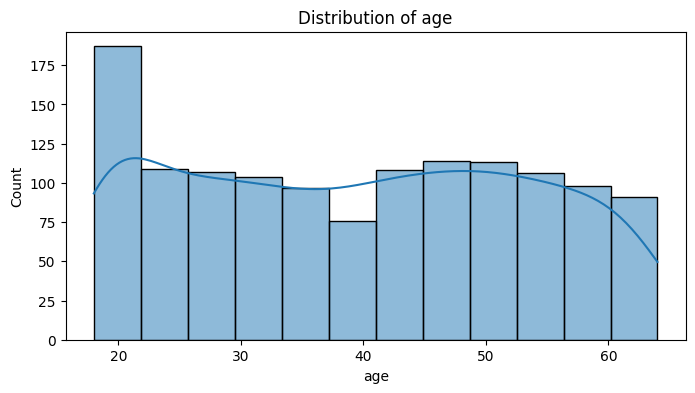

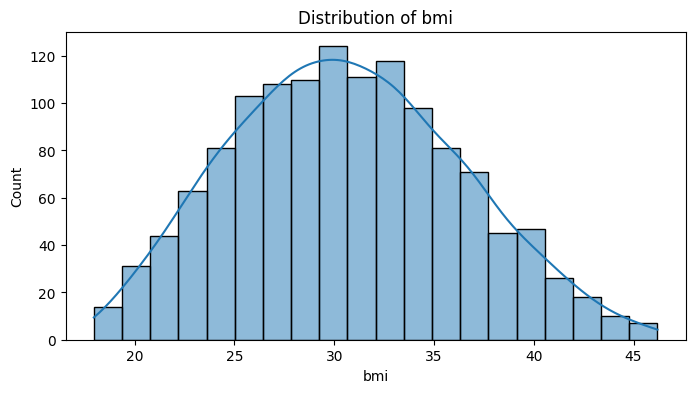

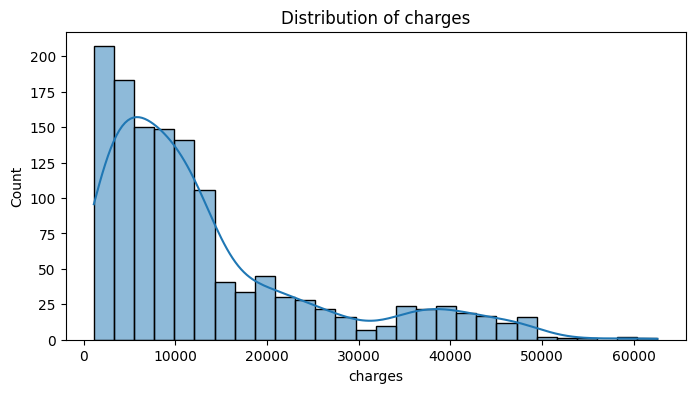

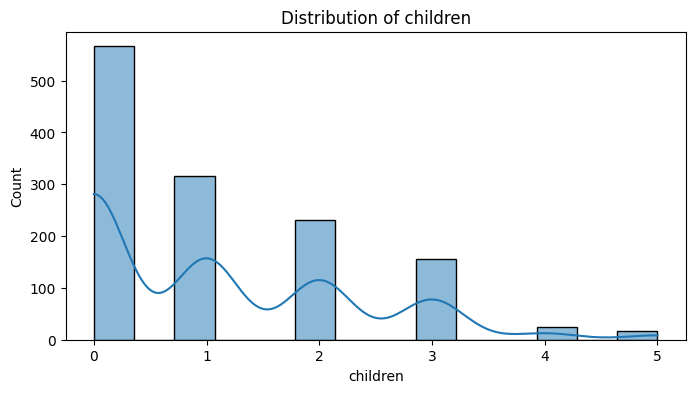

In [15]:

for feature in num_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

>Processing and Transformation

In [16]:
for feature in num_features:
    # Calculate skewness
    skewness = df[feature].skew()
    print('Skewness of features:',feature)
    print(skewness)



Skewness of features: age
0.04480790970778466
Skewness of features: bmi
0.18381570091553498
Skewness of features: charges
1.4905300534494292
Skewness of features: children
0.9359033121886735


In [17]:
df['charges_log'] = np.log(df['charges'])
df.drop('charges', axis=1, inplace=True)

In [18]:
# Map binary features to 0/1
df['sex'] = df['sex'].map({'male': 0, 'female': 1})
df['smoker'] = df['smoker'].map({'no': 0, 'yes': 1})

# Define feature lists
num_features = ['age', 'bmi', 'children']
binary_features = ['sex', 'smoker']
region_feature = ['region']

# Create the preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('bin', 'passthrough', binary_features),
        ('region', OneHotEncoder(handle_unknown='ignore'), region_feature)
    ])

# Fit and transform the features
X_processed = preprocessor.fit_transform(df)

# Get feature names for the processed DataFrame
feature_names = (
    num_features +
    binary_features +
    list(preprocessor.named_transformers_['region'].get_feature_names_out(region_feature))
)

# Convert processed features to DataFrame
X = pd.DataFrame(X_processed, columns=feature_names, index=df.index)

# Add the target variable (log charges)
y = df['charges_log']

In [52]:
X

,age,bmi,children,sex,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,-1.448940,-0.475560,-0.904741,1.0,1.0,0.0,0.0,0.0,1.0
1,-1.520163,0.551640,-0.075922,0.0,0.0,0.0,0.0,1.0,0.0
2,-0.807927,0.416897,1.581715,0.0,0.0,0.0,0.0,1.0,0.0
3,-0.451808,-1.384641,-0.904741,0.0,0.0,0.0,1.0,0.0,0.0
4,-0.523032,-0.304069,-0.904741,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
1333,0.758994,0.061664,1.581715,0.0,0.0,0.0,1.0,0.0,0.0
1334,-1.520163,0.227906,-0.904741,1.0,0.0,1.0,0.0,0.0,0.0
1335,-1.520163,1.090614,-0.904741,1.0,0.0,0.0,0.0,1.0,0.0
1336,-1.306492,-0.843043,-0.904741,1.0,0.0,0.0,0.0,0.0,1.0


>Model Building

>>Train AND TEST SPLIT

>>>Linear Regression

In [19]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

train_scores = []
t_val_scores = []
t_mae_scores = []
t_rmse_scores = []
t_r2_score = []
t2_val_scores = []
t2_mae_scores = []
t2_rmse_scores = []
t2_r2_score = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Initialize your regression model
    model = LinearRegression()
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)

    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)

    train_rmse = np.sqrt(train_mse)
    test_rmse = np.sqrt(test_mse)

    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    train_scores.append(train_mse)
    t_mae_scores.append(train_mae)
    t_rmse_scores.append(train_rmse)
    t_r2_score.append(train_r2)
    t2_val_scores.append(test_mse)
    t2_mae_scores.append(test_mae)
    t2_rmse_scores.append(test_rmse)
    t2_r2_score.append(test_r2)

train_mse_mean = np.mean(train_scores)
train_mae_mean = np.mean(t_mae_scores)
train_rmse_mean = np.mean(t_rmse_scores)
train_r2_mean = np.mean(t_r2_score)

val_mse_mean = np.mean(t2_val_scores)
val_mae_mean = np.mean(t2_mae_scores)
val_rmse_mean = np.mean(t2_rmse_scores)
val_r2_mean = np.mean(t2_r2_score)

# Create a DataFrame for comparison
data = {
    'Train MSE': [train_mse_mean],
    'Train MAE': [train_mae_mean],
    'Train RMSE': [train_rmse_mean],
    'Train R2': [train_r2_mean],
    'Validation MSE': [val_mse_mean],
    'Validation MAE': [val_mae_mean],
    'Validation RMSE': [val_rmse_mean],
    'Validation R2': [val_r2_mean]
}
comparison_table = pd.DataFrame(data)

print(comparison_table)

   Train MSE  Train MAE  Train RMSE  Train R2  Validation MSE  Validation MAE  \
0    0.19716   0.280749    0.443981   0.76439        0.200704        0.282441   

   Validation RMSE  Validation R2  
0         0.447293        0.75978  


In [20]:
from sklearn.linear_model import Ridge
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

train_scores = []
t_val_scores = []
t_mae_scores = []
t_rmse_scores = []
t_r2_score = []
t2_val_scores = []
t2_mae_scores = []
t2_rmse_scores = []
t2_r2_score = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Initialize your regression model
    model = Ridge(alpha=1.0)
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)

    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)

    train_rmse = np.sqrt(train_mse)
    test_rmse = np.sqrt(test_mse)

    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    train_scores.append(train_mse)
    t_mae_scores.append(train_mae)
    t_rmse_scores.append(train_rmse)
    t_r2_score.append(train_r2)
    t2_val_scores.append(test_mse)
    t2_mae_scores.append(test_mae)
    t2_rmse_scores.append(test_rmse)
    t2_r2_score.append(test_r2)

train_mse_mean = np.mean(train_scores)
train_mae_mean = np.mean(t_mae_scores)
train_rmse_mean = np.mean(t_rmse_scores)
train_r2_mean = np.mean(t_r2_score)

val_mse_mean = np.mean(t2_val_scores)
val_mae_mean = np.mean(t2_mae_scores)
val_rmse_mean = np.mean(t2_rmse_scores)
val_r2_mean = np.mean(t2_r2_score)

# Create a DataFrame for comparison
data = {
    'Train MSE': [train_mse_mean],
    'Train MAE': [train_mae_mean],
    'Train RMSE': [train_rmse_mean],
    'Train R2': [train_r2_mean],
    'Validation MSE': [val_mse_mean],
    'Validation MAE': [val_mae_mean],
    'Validation RMSE': [val_rmse_mean],
    'Validation R2': [val_r2_mean]
}
comparison_table = pd.DataFrame(data)

print(comparison_table)

   Train MSE  Train MAE  Train RMSE  Train R2  Validation MSE  Validation MAE  \
0   0.197174   0.281153    0.443996  0.764373        0.200688        0.282817   

   Validation RMSE  Validation R2  
0         0.447285       0.759801  


In [21]:
from sklearn.linear_model import Lasso
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

train_scores = []
t_val_scores = []
t_mae_scores = []
t_rmse_scores = []
t_r2_score = []
t2_val_scores = []
t2_mae_scores = []
t2_rmse_scores = []
t2_r2_score = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Initialize your regression model
    model = Lasso(alpha=0.1)
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)

    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)

    train_rmse = np.sqrt(train_mse)
    test_rmse = np.sqrt(test_mse)

    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    train_scores.append(train_mse)
    t_mae_scores.append(train_mae)
    t_rmse_scores.append(train_rmse)
    t_r2_score.append(train_r2)
    t2_val_scores.append(test_mse)
    t2_mae_scores.append(test_mae)
    t2_rmse_scores.append(test_rmse)
    t2_r2_score.append(test_r2)

train_mse_mean = np.mean(train_scores)
train_mae_mean = np.mean(t_mae_scores)
train_rmse_mean = np.mean(t_rmse_scores)
train_r2_mean = np.mean(t_r2_score)

val_mse_mean = np.mean(t2_val_scores)
val_mae_mean = np.mean(t2_mae_scores)
val_rmse_mean = np.mean(t2_rmse_scores)
val_r2_mean = np.mean(t2_r2_score)

# Create a DataFrame for comparison
data = {
    'Train MSE': [train_mse_mean],
    'Train MAE': [train_mae_mean],
    'Train RMSE': [train_rmse_mean],
    'Train R2': [train_r2_mean],
    'Validation MSE': [val_mse_mean],
    'Validation MAE': [val_mae_mean],
    'Validation RMSE': [val_rmse_mean],
    'Validation R2': [val_r2_mean]
}
comparison_table = pd.DataFrame(data)

print(comparison_table)

   Train MSE  Train MAE  Train RMSE  Train R2  Validation MSE  Validation MAE  \
0   0.288223   0.371274    0.536853  0.655527        0.289704        0.372013   

   Validation RMSE  Validation R2  
0         0.538033         0.6535  


In [27]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'alpha': [0.01,0.1],
    'l1_ratio': [0.001,0.1,0.2, 0.5]  # for ElasticNet
}

grid = GridSearchCV(ElasticNet(), param_grid, cv=5)
grid.fit(X, y)

best_model = grid.best_estimator_
print(best_model)

ElasticNet(alpha=0.01, l1_ratio=0.1)


In [28]:
from sklearn.linear_model import ElasticNet
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

train_scores = []
t_val_scores = []
t_mae_scores = []
t_rmse_scores = []
t_r2_score = []
t2_val_scores = []
t2_mae_scores = []
t2_rmse_scores = []
t2_r2_score = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Initialize your regression model
    model = ElasticNet(alpha=0.01, l1_ratio=0.1)
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)

    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)

    train_rmse = np.sqrt(train_mse)
    test_rmse = np.sqrt(test_mse)

    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    train_scores.append(train_mse)
    t_mae_scores.append(train_mae)
    t_rmse_scores.append(train_rmse)
    t_r2_score.append(train_r2)
    t2_val_scores.append(test_mse)
    t2_mae_scores.append(test_mae)
    t2_rmse_scores.append(test_rmse)
    t2_r2_score.append(test_r2)

train_mse_mean = np.mean(train_scores)
train_mae_mean = np.mean(t_mae_scores)
train_rmse_mean = np.mean(t_rmse_scores)
train_r2_mean = np.mean(t_r2_score)

val_mse_mean = np.mean(t2_val_scores)
val_mae_mean = np.mean(t2_mae_scores)
val_rmse_mean = np.mean(t2_rmse_scores)
val_r2_mean = np.mean(t2_r2_score)

# Create a DataFrame for comparison
data = {
    'Train MSE': [train_mse_mean],
    'Train MAE': [train_mae_mean],
    'Train RMSE': [train_rmse_mean],
    'Train R2': [train_r2_mean],
    'Validation MSE': [val_mse_mean],
    'Validation MAE': [val_mae_mean],
    'Validation RMSE': [val_rmse_mean],
    'Validation R2': [val_r2_mean]
}
comparison_table = pd.DataFrame(data)

print(comparison_table)

   Train MSE  Train MAE  Train RMSE  Train R2  Validation MSE  Validation MAE  \
0   0.198521   0.285306    0.445511  0.762763        0.201813        0.286845   

   Validation RMSE  Validation R2  
0         0.448631       0.758466  


>>>lets look at classification regression algorithm

In [29]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd

# Step 1: Split your data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Define parameter grid for DecisionTreeRegressor
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Step 3: Initialize the DecisionTreeRegressor
dt_model = DecisionTreeRegressor(random_state=42)

# Step 4: Setup GridSearchCV
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Step 5: Fit on training data
grid_search.fit(X_train, y_train)

# Step 6: Get the best estimator
best_dt_model = grid_search.best_estimator_

# Step 7: Evaluate on the hold-out test set
y_test_pred = best_dt_model.predict(X_test)

# Calculate metrics on test set
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

# Display the results
performance = pd.DataFrame({
    'Metric': ['MSE', 'MAE', 'RMSE', 'R2'],
    'Value': [test_mse, test_mae, test_rmse, test_r2]
})

print("Best hyperparameters:", grid_search.best_params_)
print(performance)

Best hyperparameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
  Metric     Value
0    MSE  0.172833
1    MAE  0.222509
2   RMSE  0.415731
3     R2  0.803279


In [30]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd

# Step 1: Split your data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Define parameter grid for DecisionTreeRegressor
param_grid models = {
    'GradientBoostingRegressor': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'XGBoostRegressor': xgb.XGBRegressor(n_estimators=100, random_state=42, objective='reg:squarederror')
}= {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Step 3: Initialize the RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)

# Step 4: Setup GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Step 5: Fit on training data
grid_search.fit(X_train, y_train)

# Step 6: Get the best estimator
best_dt_model = grid_search.best_estimator_

# Step 7: Evaluate on the hold-out test set
y_test_pred = best_dt_model.predict(X_test)

# Calculate metrics on test set
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

# Display the results
performance = pd.DataFrame({
    'Metric': ['MSE', 'MAE', 'RMSE', 'R2'],
    'Value': [test_mse, test_mae, test_rmse, test_r2]
})

print("Best hyperparameters:", grid_search.best_params_)
print(performance)

Best hyperparameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
  Metric     Value
0    MSE  0.169099
1    MAE  0.212707
2   RMSE  0.411216
3     R2  0.807529


Exception ignored in: <function ResourceTracker.__del__ at 0x72328d866020>
Traceback (most recent call last):
  File "/usr/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/usr/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/usr/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x7e3b7276e020>
Traceback (most recent call last):
  File "/usr/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/usr/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/usr/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x7b0269862020>
Traceback (most recent call last):
  File "/usr/lib/python3.13/multiprocessing/reso

In [43]:
from sklearn.ensemble import GradientBoostingRegressor
gb_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 10, 20],            # max_depth is typical for GradientBoosting
    'min_samples_split': [2, 5, 10],     # Note: GradientBoosting uses 'min_samples_split' isn't valid, use 'min_samples_split' if using sklearn's GradientBoosting
    'min_samples_leaf': [1, 2, 4]
}
gb_model = GradientBoostingRegressor(random_state=42)
gb_grid_search = GridSearchCV(estimator=gb_model,
                              param_grid=gb_param_grid,
                              cv=5,
                              scoring='neg_mean_squared_error',
                              n_jobs=-1)
gb_grid_search.fit(X_train, y_train)

# Step 6: Get the best estimator
best_gb_model = gb_grid_search.best_estimator_

# Step 7: Evaluate on the hold-out test set
y_test_pred = best_gb_model.predict(X_test)

# Calculate metrics on test set
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

# Display the results
performance = pd.DataFrame({
    'Metric': ['MSE', 'MAE', 'RMSE', 'R2'],
    'Value': [test_mse, test_mae, test_rmse, test_r2]
})

print("Best hyperparameters:", gb_grid_search.best_params_)
print(performance)

Best hyperparameters: {'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
  Metric     Value
0    MSE  0.159760
1    MAE  0.206071
2   RMSE  0.399700
3     R2  0.818158


In [44]:
import xgboost as xgb

xgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 10, 20],
    'min_child_weight': [1, 5, 10],   # XGBoost uses 'min_child_weight'
    'learning_rate': [0.01, 0.1, 0.2], # Optional, add if you want to tune learning rate
}

xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_grid_search = GridSearchCV(estimator=xgb_model,
                               param_grid=xgb_param_grid,
                               cv=5,
                               scoring='neg_mean_squared_error',
                               n_jobs=-1)
xgb_grid_search.fit(X_train, y_train)

# Step 6: Get the best estimator
best_xgb_model = xgb_grid_search.best_estimator_

# Step 7: Evaluate on the hold-out test set
y_test_pred = best_xgb_model.predict(X_test)

# Calculate metrics on test set
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

# Display the results
performance = pd.DataFrame({
    'Metric': ['MSE', 'MAE', 'RMSE', 'R2'],
    'Value': [test_mse, test_mae, test_rmse, test_r2]
})

print("Best hyperparameters:", xgb_grid_search.best_params_)
print(performance)

Best hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 10, 'n_estimators': 100}
  Metric     Value
0    MSE  0.165628
1    MAE  0.211854
2   RMSE  0.406974
3     R2  0.811480


In [45]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

# Define parameter grid for KNN
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

# Initialize KNeighborsRegressor
knn_model = KNeighborsRegressor()

# Setup GridSearchCV
knn_grid_search = GridSearchCV(estimator=knn_model,
                               param_grid=knn_param_grid,
                               cv=5,
                               scoring='neg_mean_squared_error',
                               n_jobs=-1)
knn_grid_search.fit(X_train, y_train)

# Step 6: Get the best estimator
best_knn_model = knn_grid_search.best_estimator_

# Step 7: Evaluate on the hold-out test set
y_test_pred = best_knn_model.predict(X_test)

# Calculate metrics on test set
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

# Display the results
performance = pd.DataFrame({
    'Metric': ['MSE', 'MAE', 'RMSE', 'R2'],
    'Value': [test_mse, test_mae, test_rmse, test_r2]
})

print("Best hyperparameters:", knn_grid_search.best_params_)
print(performance)

Best hyperparameters: {'algorithm': 'brute', 'n_neighbors': 3, 'weights': 'distance'}
  Metric     Value
0    MSE  0.336664
1    MAE  0.353299
2   RMSE  0.580228
3     R2  0.616804


In [46]:
from sklearn.svm import SVR

# Define parameter grid for SVR with RBF kernel
svr_param_grid = {
    'C': [0.1, 1, 10, 100],
    'epsilon': [0.1, 0.2, 0.5],
    'gamma': ['scale', 'auto', 0.01, 0.1, 1]
}

# Initialize SVR
svr_model = SVR(kernel='rbf')

# Setup GridSearchCV
svr_grid_search = GridSearchCV(estimator=svr_model,
                               param_grid=svr_param_grid,
                               cv=5,
                               scoring='neg_mean_squared_error',
                               n_jobs=-1)
svr_grid_search.fit(X_train, y_train)

# Step 6: Get the best estimator
best_svr_model = svr_grid_search.best_estimator_

# Step 7: Evaluate on the hold-out test set
y_test_pred = best_svr_model.predict(X_test)

# Calculate metrics on test set
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

# Display the results
performance = pd.DataFrame({
    'Metric': ['MSE', 'MAE', 'RMSE', 'R2'],
    'Value': [test_mse, test_mae, test_rmse, test_r2]
})

print("Best hyperparameters:", svr_grid_search.best_params_)
print(performance)

Best hyperparameters: {'C': 10, 'epsilon': 0.1, 'gamma': 0.1}
  Metric     Value
0    MSE  0.165603
1    MAE  0.194202
2   RMSE  0.406943
3     R2  0.811508


In [48]:
from sklearn.ensemble import StackingRegressor
gbr = GradientBoostingRegressor(
    max_depth=3,
    min_samples_leaf=4,
    min_samples_split=2,
    n_estimators=100
)

from sklearn.svm import SVR
svr = SVR(C=10, epsilon=0.1, gamma=0.1)

lr = LinearRegression()

gbr.fit(X_train, y_train)
svr.fit(X_train, y_train)
lr.fit(X_train, y_train)

estimators = [
    ('gbr', gbr),
    ('svr', svr),
    ('lr', lr)
]

stacking_regressor = StackingRegressor(
    estimators=estimators,
    final_estimator=LinearRegression()
)

stacking_regressor.fit(X_train, y_train)

# Step 6: Get the best estimator (the trained stacking model)
stacking_model = stacking_regressor

y_test_pred = stacking_model.predict(X_test)

# Calculate metrics
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_pred)

# Prepare performance DataFrame
performance = pd.DataFrame({
    'Metric': ['MSE', 'MAE', 'RMSE', 'R2'],
    'Value': [test_mse, test_mae, test_rmse, test_r2]
})

# Display results
print("Best hyperparameters for individual models:")
print("GradientBoostingRegressor:", {'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100})
print("SVR:", {'C': 10, 'epsilon': 0.1, 'gamma': 0.1})
print("\nStacking Regressor Performance on Test Set:")
print(performance)

Best hyperparameters for individual models:
GradientBoostingRegressor: {'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
SVR: {'C': 10, 'epsilon': 0.1, 'gamma': 0.1}

Stacking Regressor Performance on Test Set:
  Metric     Value
0    MSE  0.158211
1    MAE  0.210000
2   RMSE  0.397758
3     R2  0.819922


Exception ignored in: <function ResourceTracker.__del__ at 0x705b9a16e020>
Traceback (most recent call last):
  File "/usr/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/usr/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/usr/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x74a034c6a020>
Traceback (most recent call last):
  File "/usr/lib/python3.13/multiprocessing/resource_tracker.py", line 82, in __del__
  File "/usr/lib/python3.13/multiprocessing/resource_tracker.py", line 91, in _stop
  File "/usr/lib/python3.13/multiprocessing/resource_tracker.py", line 116, in _stop_locked
ChildProcessError: [Errno 10] No child processes
Exception ignored in: <function ResourceTracker.__del__ at 0x7d7cf4e5e020>
Traceback (most recent call last):
  File "/usr/lib/python3.13/multiprocessing/reso

>Full Workflow Summary
1. Libraries and Data Loading

    Loaded necessary Python libraries (e.g., pandas, numpy, matplotlib, seaborn, sklearn, xgboost).
    Loaded the dataset into a DataFrame.

2. Exploratory Data Analysis (EDA)

    Examined dataset info, descriptive statistics (info(), describe()).
    Checked for missing values, duplicated entries, correlations (corr()), unique values (nunique()), shape, and previewed the first few rows (head()).
    Visualized feature distributions with histograms.
    Identified potential outliers using box-and-whisker plots.

3. Data Preprocessing

    Applied feature scaling:
        StandardScaler for numerical features.
        Binary encoding for categorical variables.
        One-hot encoding for categorical features.
    Transformed data for modeling.

4. Train-Test Split

    Split data into training and hold-out test sets (e.g., 80/20 split).

5. Model Training & Hyperparameter Tuning

    Trained multiple models with hyperparameter tuning:

    Linear Models:
        Linear Regression
        Ridge Regression
        Lasso Regression
        ElasticNet

    Tree-Based & Ensemble Models:
        Decision Tree Regressor (max_depth=5, min_samples_leaf=1, min_samples_split=2)
        Random Forest Regressor (max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=100)
        Gradient Boosting Regressor (max_depth=3, min_samples_leaf=4, min_samples_split=2, n_estimators=100)
        XGBoost Regressor (learning_rate=0.1, max_depth=3, min_child_weight=10, n_estimators=100)
        K-Nearest Neighbors (n_neighbors=3, algorithm='brute', weights='distance')
        Support Vector Regression (C=10, epsilon=0.1, gamma=0.1)

    Evaluated models on training data with metrics like MSE, MAE, RMSE, R².

    Selected best hyperparameters based on validation performance.

6. Model Evaluation

    Assessed individual models' performance:
        Notable results:
            Gradient Boosting Regressor achieved an R² of approximately 0.82 on validation.
            Random Forest and Decision Tree also performed well.
            KNN and SVR had moderate performance.
    Observed that models like Gradient Boosting and Random Forest had the best validation scores.

7. Model Ensembling via Stacking

    Created a stacking regressor combining the top-performing models:
        Base estimators: Gradient Boosting, SVR
        Meta-estimator: Linear Regression
    Trained the stacking model on the training data.

8. Final Performance on Test Set

    Evaluated the stacking regressor on the hold-out test set.
    Reported performance metrics:
        MSE: 0.1582
        MAE: 0.21
        RMSE: 0.3978
        R²: 0.82

Conclusion:
The stacking ensemble achieved excellent performance, explaining over 82% of the variance with low error metrics, indicating a robust and well-generalized model.